# Exploratory Data Analysis

## Setup

In [5]:
# Importing packages
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import seaborn as sns
import statsmodels.api as sm
from plotnine import ggplot, aes, geom_point
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

# Reading in data
ipeds = pd.read_excel("Data/IPEDS_data.xlsx")

## Display all columns
pd.set_option('display.max_columns', None)

## Summary Statistics

In [2]:
# Describing numerical data
ipeds.describe()

ID number    year  Longitude location of institution  \
count    1534.000000  1534.0                        1534.000000   
mean   189091.037810  2013.0                         -88.342338   
std     58641.915456     0.0                          14.838804   
min    100654.000000  2013.0                        -158.062444   
25%    153148.500000  2013.0                         -94.576341   
50%    186508.000000  2013.0                         -84.514218   
75%    215730.000000  2013.0                         -77.207136   
max    456490.000000  2013.0                         -67.456534   

       Latitude location of institution  Applicants total  Admissions total  \
count                       1534.000000       1377.000000       1377.000000   
mean                          38.729993       6391.193174       3554.880174   
std                            4.832832       8787.469171       4309.457606   
min                           19.701854          0.000000          0.000000   
25%                           35.348340       1488.000000        950.000000   
50%                           39.946096       3350.000000       2056.000000   
75%                           41.984929       7016.000000       4203.000000   
max                           64.857053      72676.000000      35815.000000   

       Enrolled total  Percent of freshmen submitting SAT scores  \
count     1377.000000                                1257.000000   
mean      1043.046478                                  53.927605   
std       1285.165519                                  34.385164   
min          0.000000                                   0.000000   
25%        287.000000                                  16.000000   
50%        538.000000                                  65.000000   
75%       1246.000000                                  86.000000   
max      10241.000000                                 100.000000   

       Percent of freshmen submitting ACT scores  \
count                                1259.000000   
mean                                   53.085782   
std                                    31.658662   
min                                     0.000000   
25%                                    26.000000   
50%                                    49.000000   
75%                                    87.000000   
max                                   100.000000   

       SAT Critical Reading 25th percentile score  \
count                                 1169.000000   
mean                                   470.340462   
std                                     68.368390   
min                                    310.000000   
25%                                    430.000000   
50%                                    460.000000   
75%                                    500.000000   
max                                    720.000000   

       SAT Critical Reading 75th percentile score  \
count                                 1169.000000   
mean                                   578.297690   
std                                     70.169391   
min                                    360.000000   
25%                                    530.000000   
50%                                    570.000000   
75%                                    620.000000   
max                                    800.000000   

       SAT Math 25th percentile score  SAT Math 75th percentile score  \
count                     1182.000000                     1182.000000   
mean                       480.514382                      588.311337   
std                         72.464475                       71.871189   
min                        280.000000                      410.000000   
25%                        430.000000                      540.000000   
50%                        470.000000                      580.000000   
75%                        510.000000                      630.000000   
max                        770.000000                      800.000000   


In [3]:
# Describing and analyzing categorical variables
ipeds_objects = list(ipeds.select_dtypes(include="object"))
ipeds[ipeds_objects].describe()

Name  ZIP code Highest degree offered  \
count                  1534      1534                   1534   
unique                 1517      1513                      6   
top     Westminster College      5401        Master's degree   
freq                      3         2                    587   

               County name Religious affiliation  \
count                 1534                  1532   
unique                 629                    54   
top     Los Angeles County        Not applicable   
freq                    28                   947   

       Offers Less than one year certificate  \
count                                   1532   
unique                                     2   
top                               Implied no   
freq                                    1200   

       Offers One but less than two years certificate  \
count                                            1532   
unique                                              2   
top                                        Implied no   
freq                                             1235   

       Offers Associate's degree Offers Two but less than 4 years certificate  \
count                       1532                                         1532   
unique                         2                                            2   
top                   Implied no                                   Implied no   
freq                         884                                         1460   

       Offers Bachelor's degree Offers Postbaccalaureate certificate  \
count                      1532                                 1532   
unique                        2                                    2   
top                         Yes                           Implied no   
freq                       1522                                  870   

       Offers Master's degree Offers Post-master's certificate  \
count                    1532                             1532   
unique                      2                                2   
top                       Yes                       Implied no   
freq                     1249                              992   

       Offers Doctor's degree - research/scholarship  \
count                                           1532   
unique                                             2   
top                                       Implied no   
freq                                            1021   

       Offers Doctor's degree - professional practice  \
count                                            1532   
unique                                              2   
top                                        Implied no   
freq                                             1097   

       Offers Doctor's degree - other Offers Other degree State abbreviation  \
count                            1532                1532               1534   
unique                              2                   2                 51   
top                        Implied no          Implied no           New York   
freq                             1475                1526                122   

       FIPS state code                              Geographic region  \
count             1534                                           1534   
unique              51                                              9   
top           New York  Southeast AL AR FL GA KY LA MS NC SC TN VA WV   
freq               122                                            385   

                          Sector of institution Level of institution  \
count                                      1534                 1534   
unique                                        2                    1   
top     Private not-for-profit, 4-year or above   Four or more years   
freq                                        971                 1534   

        Control of institution Historically Black College or University  \
count                     1534                

## Correlation matrix

<Axes: >

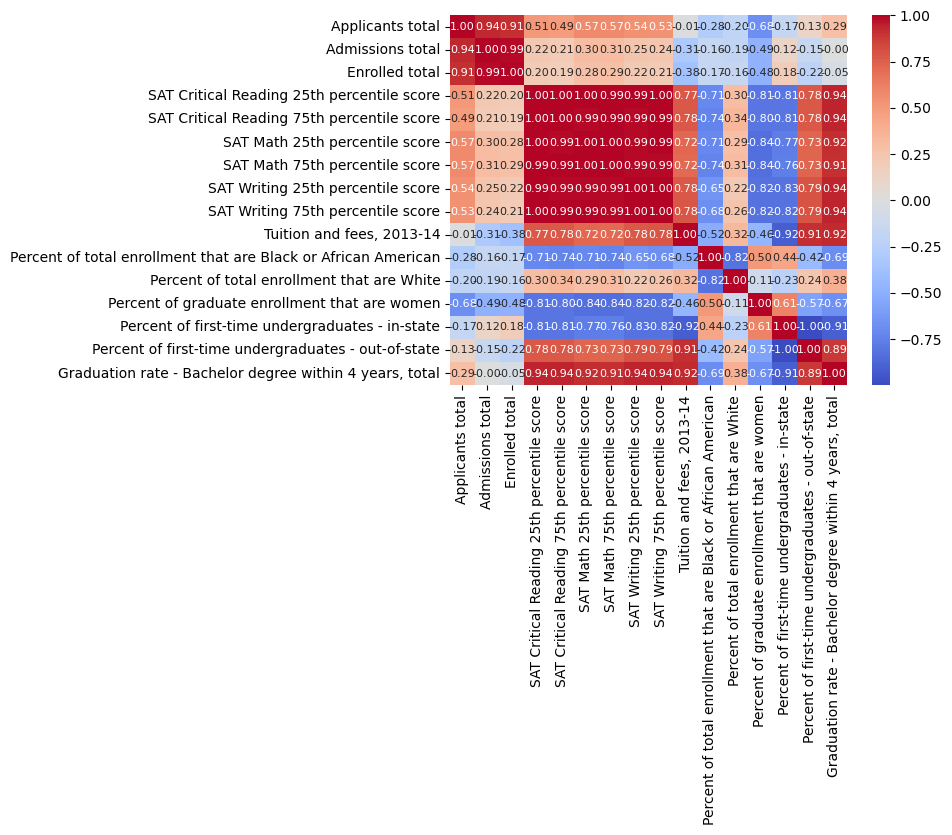

In [4]:
# Compute correlation matrix
ipeds_corr = ipeds.loc[:,['Applicants total',
                          'Admissions total',
                          'Enrolled total',
                          'SAT Critical Reading 25th percentile score',
                          'SAT Critical Reading 75th percentile score',
                          'SAT Math 25th percentile score',
                          'SAT Math 75th percentile score',
                          'SAT Writing 25th percentile score',
                          'SAT Writing 75th percentile score',
                          'Tuition and fees, 2013-14',
                          'Percent of total enrollment that are Black or African American',
                          'Percent of total enrollment that are White',
                          'Percent of graduate enrollment that are women',
                          'Percent of first-time undergraduates - in-state',
                          'Percent of first-time undergraduates - out-of-state',
                          'Graduation rate - Bachelor degree within 4 years, total'
                          
                          
                            ]].corr()

corr_matrix = ipeds_corr.corr()

# Create heatmap
#plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 8})
#plt.title('Correlation Heatmap')
#plt.show()

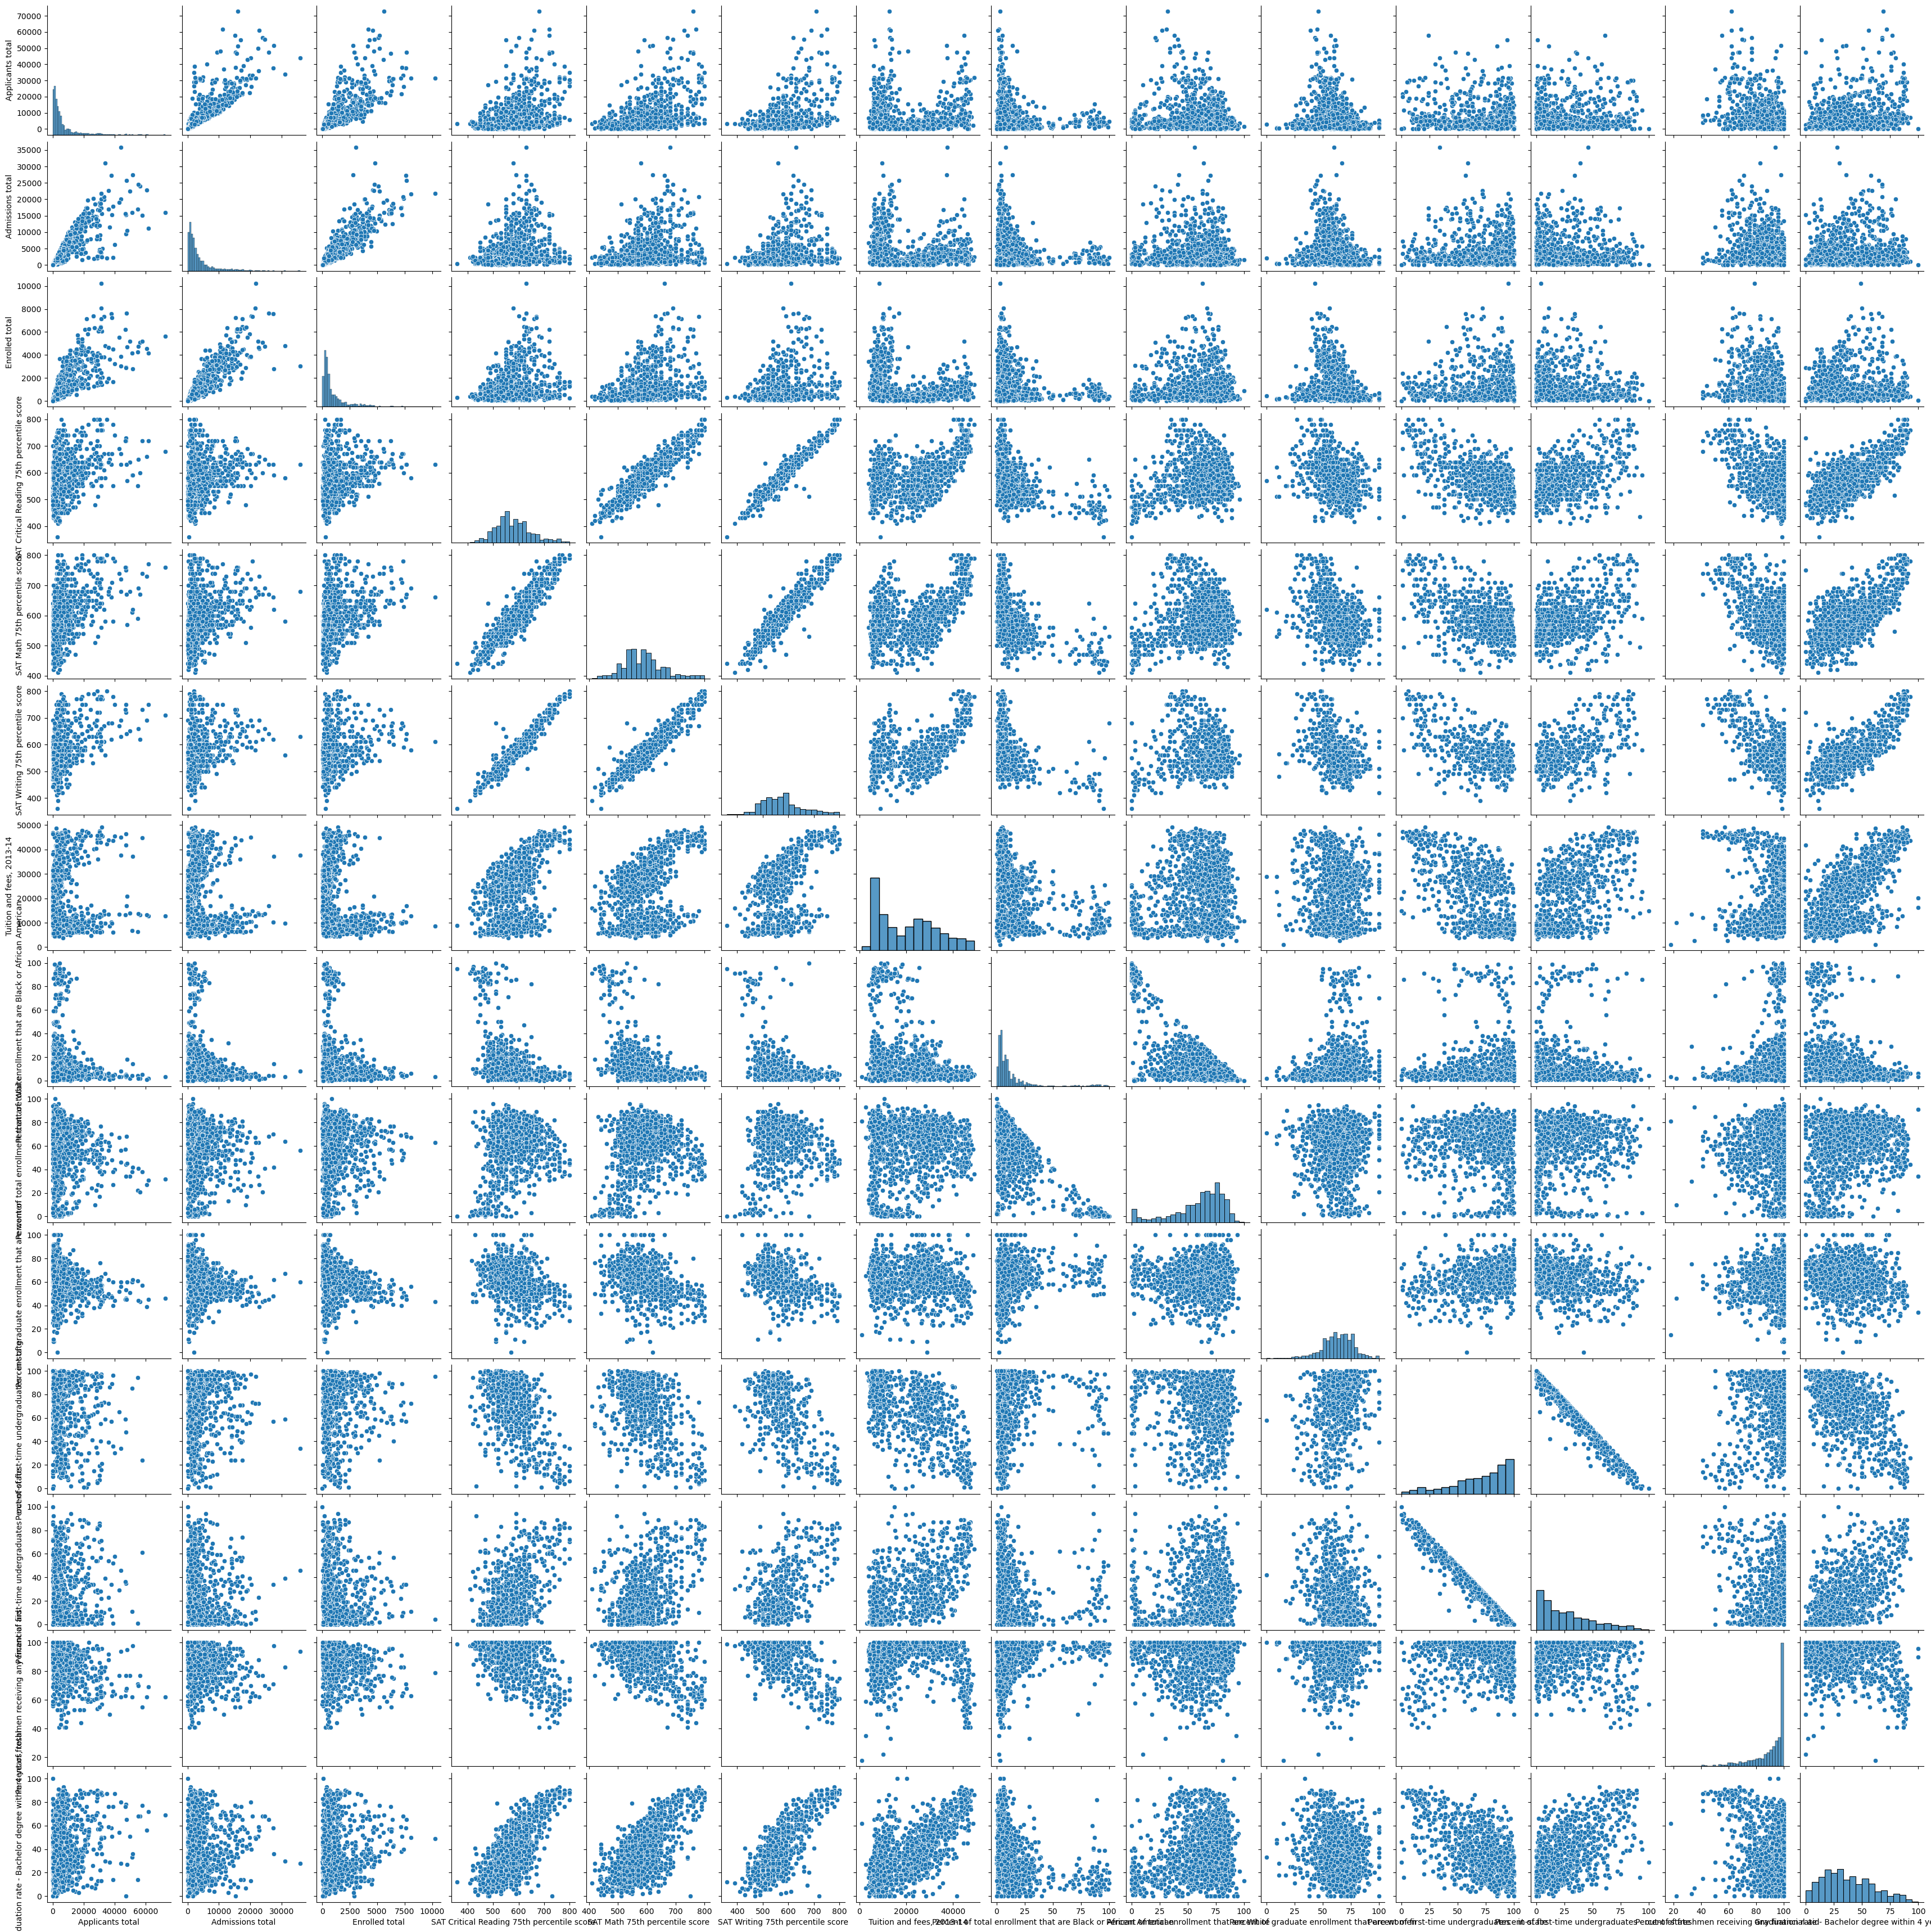

In [8]:
sns.pairplot(ipeds.loc[:,['Applicants total',
                          'Admissions total',
                          'Enrolled total',
                          'SAT Critical Reading 75th percentile score',
                          'SAT Math 75th percentile score',
                          'SAT Writing 75th percentile score',
                          'Tuition and fees, 2013-14',
                          'Percent of total enrollment that are Black or African American',
                          'Percent of total enrollment that are White',
                          'Percent of graduate enrollment that are women',
                          'Percent of first-time undergraduates - in-state',
                          'Percent of first-time undergraduates - out-of-state',
                          'Percent of freshmen receiving any financial aid',
                          'Graduation rate - Bachelor degree within 4 years, total'
                          
                          
                            ]])

In [13]:
ipeds.head().sort_values("Name")

ID number                                 Name  year    ZIP code  \
0     100654             Alabama A & M University  2013       35762   
4     100724             Alabama State University  2013  36104-0271   
2     100690                   Amridge University  2013  36117-3553   
1     100663  University of Alabama at Birmingham  2013  35294-0110   
3     100706  University of Alabama in Huntsville  2013       35899   

                              Highest degree offered        County name  \
0             Doctor's degree - research/scholarship     Madison County   
4  Doctor's degree - research/scholarship and pro...  Montgomery County   
2  Doctor's degree - research/scholarship and pro...  Montgomery County   
1  Doctor's degree - research/scholarship and pro...   Jefferson County   
3  Doctor's degree - research/scholarship and pro...     Madison County   

   Longitude location of institution  Latitude location of institution  \
0                         -86.568502                         34.783368   
4                         -86.295677                         32.364317   
2                         -86.174010                         32.362609   
1                         -86.809170                         33.502230   
3                         -86.638420                         34.722818   

  Religious affiliation Offers Less than one year certificate  \
0        Not applicable                            Implied no   
4        Not applicable                            Implied no   
2    Churches of Christ                            Implied no   
1        Not applicable                            Implied no   
3        Not applicable                                   Yes   

  Offers One but less than two years certificate Offers Associate's degree  \
0                                     Implied no                Implied no   
4                                     Implied no                Implied no   
2                                     Implied no                       Yes   
1                                            Yes                Implied no   
3                                     Implied no                Implied no   

  Offers Two but less than 4 years certificate Offers Bachelor's degree  \
0                                   Implied no                      Yes   
4                                   Implied no                      Yes   
2                                   Implied no                      Yes   
1                                          Yes                      Yes   
3                                   Implied no                      Yes   

  Offers Postbaccalaureate certificate Offers Master's degree  \
0                           Implied no                    Yes   
4                           Implied no                    Yes   
2                           Implied no                    Yes   
1                                  Yes                    Yes   
3                                  Yes                    Yes   

  Offers Post-master's certificate  \
0                       Implied no   
4                              Yes   
2                       Implied no   
1                              Yes   
3                              Yes   

  Offers Doctor's degree - research/scholarship  \
0                                           Yes   
4                                           Yes   
2                                           Yes   
1                                           Yes   
3                                           Yes   

  Offers Doctor's degree - professional practice  \
0                                     Implied no   
4                                            Yes   
2                                            Yes   
1                                            Yes   
3                                            Yes   

  Offers Doctor's degree - other Offers Other degree  Applicants total  \
0                     Implied no          Implied no   

## Data Visualizations

In [ ]:
### States by average graduation % rate in 4 years

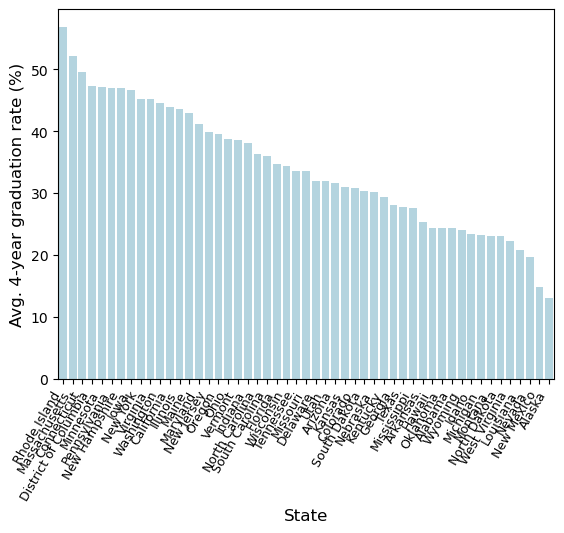

In [45]:
mean_state_gradrates = ipeds.groupby('State abbreviation')['Graduation rate - Bachelor degree within 4 years, total'].mean()
mean_state_gradrates= pd.DataFrame(mean_state_gradrates).reset_index().sort_values('Graduation rate - Bachelor degree within 4 years, total', ascending=False)
sns.barplot(x='State abbreviation', y='Graduation rate - Bachelor degree within 4 years, total', data=mean_state_gradrates, color = 'lightblue')
plt.xticks(rotation=60, ha='right', fontsize=9)  # Right-align the labels
plt.xlabel("State", fontsize=12)
plt.ylabel("Avg. 4-year graduation rate (%)", fontsize=12)
plt.show()


In [ ]:
### Religious affiliation and graduation rate

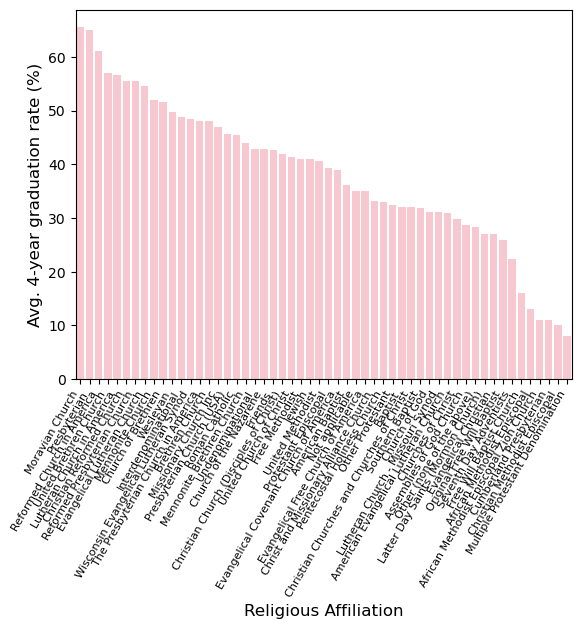

In [47]:
mean_rel_gradrates = ipeds.groupby('Religious affiliation')['Graduation rate - Bachelor degree within 4 years, total'].mean()
mean_rel_gradrates= pd.DataFrame(mean_rel_gradrates).reset_index().sort_values('Graduation rate - Bachelor degree within 4 years, total', ascending=False)
sns.barplot(x='Religious affiliation', y='Graduation rate - Bachelor degree within 4 years, total', data=mean_rel_gradrates, color = 'pink')
plt.xticks(rotation=60, ha='right', fontsize=8)  # Right-align the labels
plt.xlabel("Religious Affiliation", fontsize=12)
plt.ylabel("Avg. 4-year graduation rate (%)", fontsize=12)
plt.show()

In [ ]:
### Percent addmitted and graduation rate

<Axes: xlabel='Percent admitted - total', ylabel='Graduation rate - Bachelor degree within 4 years, total'>

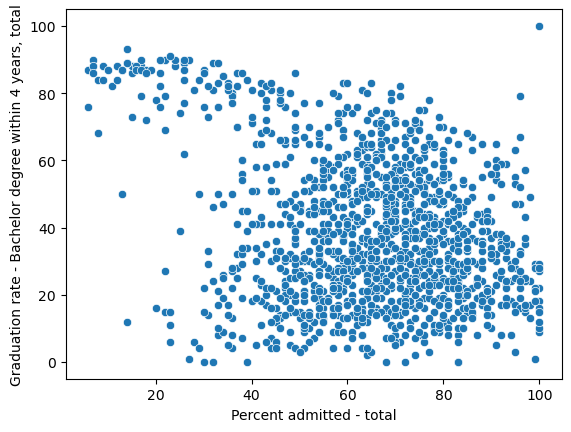

In [60]:
sns.scatterplot(x="Percent admitted - total", y='Graduation rate - Bachelor degree within 4 years, total', data=ipeds)